In [2]:
# data manipulation
import numpy as np
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import metrics

In [3]:
# sets matplotlib to inline
%matplotlib inline  

# importing LogisticRegression for Test and Train
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("class B.csv")

In [5]:
df.head()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.11,1,0.85,6,308,5,0,0,sales,medium
1,0.11,1,0.85,6,308,5,0,0,sales,medium
2,0.11,1,0.85,6,308,5,0,0,sales,medium
3,0.37,0,0.82,3,199,5,0,0,management,medium
4,0.46,1,0.48,2,141,3,1,0,sales,low


In [6]:
df.shape

(4500, 10)

In [7]:
df.columns

Index(['satisfaction_level', 'left', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
len(object_col)

NameError: name 'object_col' is not defined

In [ ]:
df.dtypes

In [ ]:
df.isnull().any()

In [ ]:
df.corr()

In [9]:
def plot_factorplot(attr,labels=None):
    sns.catplot(data=df,kind='count',height=5,aspect=1.5,x=attr)

In [10]:
cat_df=df.select_dtypes(include='object')

<Figure size 1080x1080 with 0 Axes>

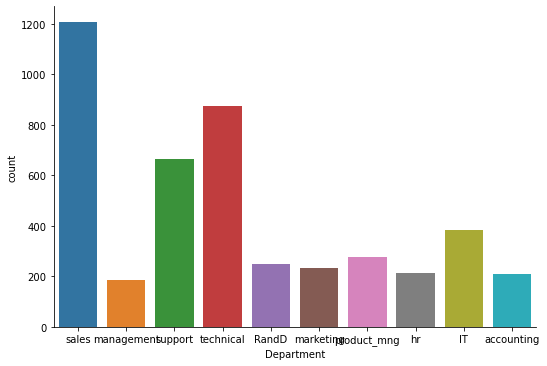

<Figure size 1080x1080 with 0 Axes>

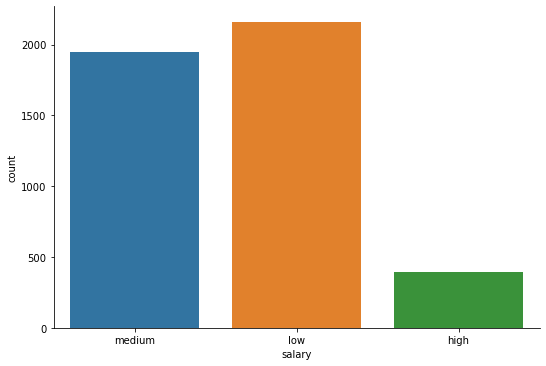

In [11]:
for i in cat_df:
    plt.figure(figsize=(15, 15))
    plot_factorplot(i) 

In [12]:
df.corr()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,-0.738530,-0.503643,-0.703798,-0.329218,-0.306659,0.095644,NaN
left,-0.738530,1.000000,0.320658,0.534286,0.391249,0.180971,-0.140997,NaN
last_evaluation,-0.503643,0.320658,1.000000,0.343459,0.311917,0.113485,-0.021295,NaN
number_project,-0.703798,0.534286,0.343459,1.000000,0.410819,0.228439,-0.069309,NaN
average_montly_hours,-0.329218,0.391249,0.311917,0.410819,1.000000,0.066273,-0.080354,NaN
time_spend_company,-0.306659,0.180971,0.113485,0.228439,0.066273,1.000000,-0.019919,NaN
Work_accident,0.095644,-0.140997,-0.021295,-0.069309,-0.080354,-0.019919,1.000000,NaN
promotion_last_5years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#cat_col = df.select_dtypes(exclude=np.number).columns
cat_col = df.select_dtypes(exclude=np.number)
cat_col

,Department,salary
0,sales,medium
1,sales,medium
2,sales,medium
3,management,medium
4,sales,low
...,...,...
4495,product_mng,medium
4496,support,medium
4497,technical,medium
4498,IT,low


In [14]:
for i in cat_col:
    print(df[i].value_counts())

sales          1209
technical       875
support         665
IT              384
product_mng     275
RandD           249
marketing       233
hr              215
accounting      208
management      187
Name: Department, dtype: int64
low       2161
medium    1944
high       395
Name: salary, dtype: int64


In [15]:
numerical_col = df.select_dtypes(include=np.number)
numerical_col

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.11,1,0.85,6,308,5,0,0
1,0.11,1,0.85,6,308,5,0,0
2,0.11,1,0.85,6,308,5,0,0
3,0.37,0,0.82,3,199,5,0,0
4,0.46,1,0.48,2,141,3,1,0
...,...,...,...,...,...,...,...,...
4495,0.63,0,0.85,3,151,4,1,0
4496,0.59,0,0.91,4,142,3,1,0
4497,0.68,0,0.72,4,274,3,0,0
4498,0.66,0,0.75,4,203,3,1,0


In [16]:
for i in numerical_col:
    print(i)

satisfaction_level
left
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
promotion_last_5years


In [17]:
df.columns.shape

(10,)

In [18]:
one_hot_categorical_variables = pd.get_dummies(cat_col)

In [19]:
one_hot_categorical_variables.head()

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [20]:
df = pd.concat([numerical_col,one_hot_categorical_variables],sort=False,axis=1)
df.head()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.11,1,0.85,6,308,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.11,1,0.85,6,308,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,1,0.85,6,308,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.37,0,0.82,3,199,5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.46,1,0.48,2,141,3,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
x = df.drop(columns='left')

In [22]:
y = df['left']

In [23]:
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
model = GaussianNB()
model.fit(x_train, y_train)
train_Pred = model.predict(x_train)

In [24]:
metrics.confusion_matrix(y_train,train_Pred)

array([[2485,  111],
       [ 120,  434]], dtype=int64)

In [25]:
metrics.accuracy_score(y_train,train_Pred)

0.9266666666666666

In [26]:
test_Pred = model.predict(x_test)

In [27]:
metrics.confusion_matrix(y_test,test_Pred)

array([[1086,   64],
       [  46,  154]], dtype=int64)

In [28]:
metrics.accuracy_score(y_test,test_Pred)

0.9185185185185185

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, test_Pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, test_Pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, test_Pred))

Accuracy: 0.9185185185185185
Precision: 0.7064220183486238
Recall: 0.77
